In [10]:
import torch
import torch.optim as optim
import torch.nn as nn
from torchvision import datasets, transforms
from torchsummary import summary

# Importing model and utils from separate files
import model
import utils

In [11]:
# CUDA
cuda = torch.cuda.is_available()
print("CUDA Available?", cuda)
device = torch.device("cuda" if cuda else "cpu")

CUDA Available? True


In [12]:
# Train and test data transformations
train_transforms = transforms.Compose([
    transforms.RandomApply([transforms.CenterCrop(22), ], p=0.1),
    transforms.Resize((28, 28)),
    transforms.RandomRotation((-15., 15.), fill=0),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# Loading MNIST dataset
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

# Creating data loaders
batch_size = 512
kwargs = {'batch_size': batch_size, 'shuffle': True, 'num_workers': 2, 'pin_memory': True}
test_loader = torch.utils.data.DataLoader(test_data, **kwargs)
train_loader = torch.utils.data.DataLoader(train_data, **kwargs)

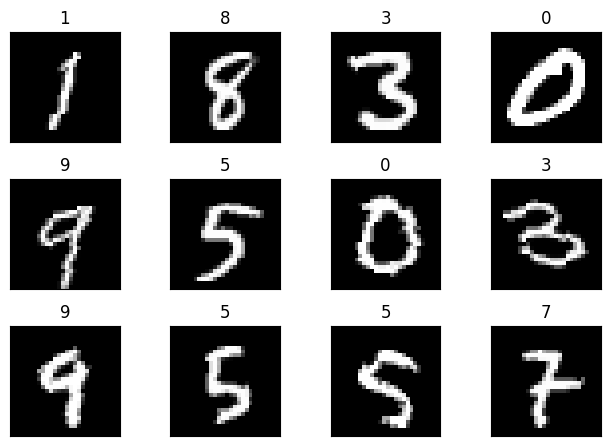

In [13]:
# Plotting sample data
utils.plot_sample_data(train_loader)

In [14]:
# Creating model
model = model.Net().to(device)

# Displaying model summary
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             288
            Conv2d-2           [-1, 64, 24, 24]          18,432
         MaxPool2d-3           [-1, 64, 12, 12]               0
            Conv2d-4          [-1, 128, 10, 10]          73,728
            Conv2d-5            [-1, 256, 8, 8]         294,912
            Conv2d-6            [-1, 512, 6, 6]       1,179,648
         AvgPool2d-7            [-1, 512, 1, 1]               0
            Linear-8                  [-1, 128]          65,536
            Linear-9                   [-1, 10]           1,280
Total params: 1,633,824
Trainable params: 1,633,824
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.88
Params size (MB): 6.23
Estimated Total Size (MB): 7.12
---------------------------------------

In [15]:
# Creating optimizer and scheduler
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1, verbose=True)
train_criterion = nn.CrossEntropyLoss()
test_criterion = nn.CrossEntropyLoss(reduction='sum')
num_epochs = 20

# Training and testing the model
train_losses = []
test_losses = []
train_acc = []
test_acc = []
for epoch in range(1, num_epochs+1):
    print(f'Epoch {epoch}')
    utils.train(model, device, train_loader, optimizer, train_criterion, train_losses, train_acc)
    utils.test(model, device, test_loader, test_criterion, test_losses, test_acc)
    scheduler.step()

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=2.3024 Batch_id=117 Accuracy=9.75: 100%|██████████| 118/118 [00:25<00:00,  4.69it/s]


Test set: Average loss: 2.2957, Accuracy: 974/10000 (9.74%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=2.2913 Batch_id=117 Accuracy=17.16: 100%|██████████| 118/118 [00:20<00:00,  5.63it/s]


Test set: Average loss: 2.2930, Accuracy: 2778/10000 (27.78%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=2.1342 Batch_id=117 Accuracy=18.42: 100%|██████████| 118/118 [00:21<00:00,  5.36it/s]


Test set: Average loss: 2.1148, Accuracy: 1797/10000 (17.97%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.6809 Batch_id=117 Accuracy=53.34: 100%|██████████| 118/118 [00:21<00:00,  5.37it/s]


Test set: Average loss: 0.4518, Accuracy: 8610/10000 (86.10%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.2797 Batch_id=117 Accuracy=86.91: 100%|██████████| 118/118 [00:27<00:00,  4.25it/s]


Test set: Average loss: 0.2283, Accuracy: 9286/10000 (92.86%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.1096 Batch_id=117 Accuracy=92.20: 100%|██████████| 118/118 [00:21<00:00,  5.37it/s]


Test set: Average loss: 0.1258, Accuracy: 9631/10000 (96.31%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.2324 Batch_id=117 Accuracy=94.03: 100%|██████████| 118/118 [00:21<00:00,  5.45it/s]


Test set: Average loss: 0.1321, Accuracy: 9564/10000 (95.64%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.1581 Batch_id=117 Accuracy=95.01: 100%|██████████| 118/118 [00:22<00:00,  5.36it/s]


Test set: Average loss: 0.0827, Accuracy: 9739/10000 (97.39%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.1767 Batch_id=117 Accuracy=95.68: 100%|██████████| 118/118 [00:23<00:00,  5.09it/s]


Test set: Average loss: 0.0906, Accuracy: 9706/10000 (97.06%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0980 Batch_id=117 Accuracy=96.58: 100%|██████████| 118/118 [00:21<00:00,  5.40it/s]


Test set: Average loss: 0.0739, Accuracy: 9765/10000 (97.65%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 11


Train: Loss=0.0938 Batch_id=117 Accuracy=97.38: 100%|██████████| 118/118 [00:22<00:00,  5.14it/s]


Test set: Average loss: 0.0502, Accuracy: 9850/10000 (98.50%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 12


Train: Loss=0.0834 Batch_id=117 Accuracy=97.42: 100%|██████████| 118/118 [00:22<00:00,  5.34it/s]


Test set: Average loss: 0.0471, Accuracy: 9858/10000 (98.58%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 13


Train: Loss=0.1350 Batch_id=117 Accuracy=97.42: 100%|██████████| 118/118 [00:22<00:00,  5.36it/s]


Test set: Average loss: 0.0483, Accuracy: 9855/10000 (98.55%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 14


Train: Loss=0.0335 Batch_id=117 Accuracy=97.52: 100%|██████████| 118/118 [00:21<00:00,  5.47it/s]


Test set: Average loss: 0.0478, Accuracy: 9857/10000 (98.57%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 15


Train: Loss=0.0333 Batch_id=117 Accuracy=97.52: 100%|██████████| 118/118 [00:20<00:00,  5.64it/s]


Test set: Average loss: 0.0464, Accuracy: 9863/10000 (98.63%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0496 Batch_id=117 Accuracy=97.58: 100%|██████████| 118/118 [00:21<00:00,  5.37it/s]


Test set: Average loss: 0.0466, Accuracy: 9867/10000 (98.67%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0750 Batch_id=117 Accuracy=97.57: 100%|██████████| 118/118 [00:21<00:00,  5.49it/s]


Test set: Average loss: 0.0443, Accuracy: 9865/10000 (98.65%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0761 Batch_id=117 Accuracy=97.65: 100%|██████████| 118/118 [00:21<00:00,  5.43it/s]


Test set: Average loss: 0.0461, Accuracy: 9861/10000 (98.61%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0257 Batch_id=117 Accuracy=97.66: 100%|██████████| 118/118 [00:21<00:00,  5.43it/s]


Test set: Average loss: 0.0436, Accuracy: 9868/10000 (98.68%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.1032 Batch_id=117 Accuracy=97.64: 100%|██████████| 118/118 [00:21<00:00,  5.48it/s]


Test set: Average loss: 0.0428, Accuracy: 9867/10000 (98.67%)

Adjusting learning rate of group 0 to 1.0000e-04.


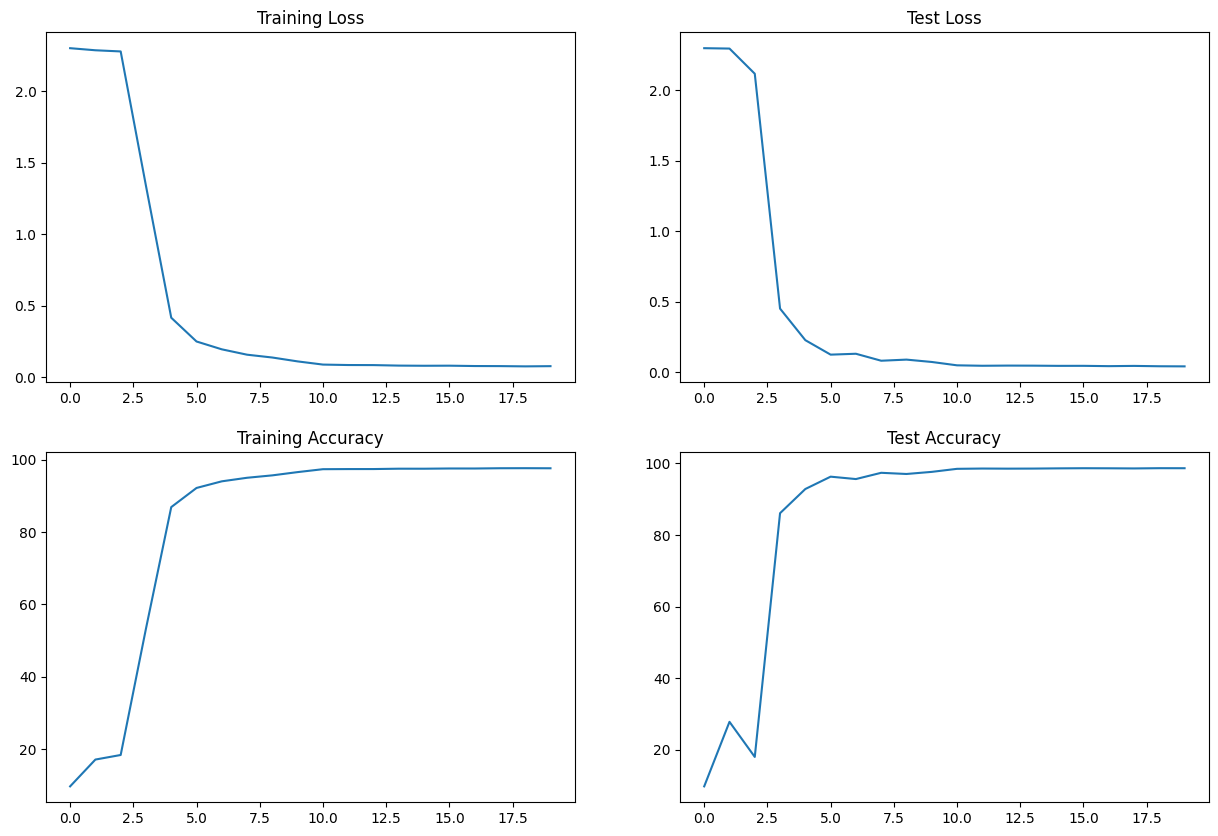

In [16]:
# Plotting training metrics
utils.plot_train_metrics(train_losses, train_acc, test_losses, test_acc)